In [3]:
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('penguins.csv',index_col=0)

In [5]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
id,,,,,,,
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male


In [6]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [9]:
# Map the species to numerical values
df['species'] = df['species'].map({'Adelie': 1, 'Gentoo': 2, 'Chinstrap': 3})

C:\Users\parma\AppData\Local\Temp\ipykernel_28392\3177702306.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['species'] = df['species'].map({'Adelie': 1, 'Gentoo': 2, 'Chinstrap': 3})


In [10]:
x = pd.get_dummies(df.drop('species', axis=1), drop_first=True)
y = df['species']

In [11]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
id,,,,,,,
0,1,Torgersen,39.1,18.7,181.0,3750.0,male
1,1,Torgersen,39.5,17.4,186.0,3800.0,female
2,1,Torgersen,40.3,18.0,195.0,3250.0,female
4,1,Torgersen,36.7,19.3,193.0,3450.0,female
5,1,Torgersen,39.3,20.6,190.0,3650.0,male
...,...,...,...,...,...,...,...
339,3,Dream,55.8,19.8,207.0,4000.0,male
340,3,Dream,43.5,18.1,202.0,3400.0,female
341,3,Dream,49.6,18.2,193.0,3775.0,male


In [12]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [13]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# Initialize the Logistic Regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)

In [15]:
# Train the model
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=500, multi_class='multinomial')

In [16]:
# Make predictions
y_pred = model.predict(X_test_scaled)

In [17]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy * 100:.2f}%")

Model accuracy: 99.00%


In [18]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

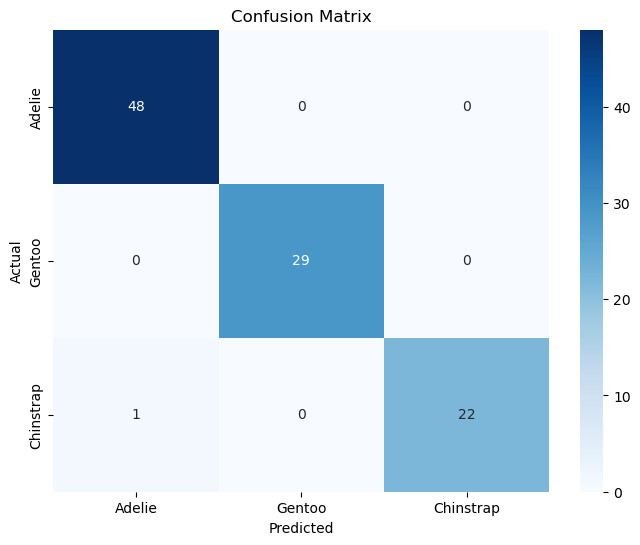

In [19]:
# Plot the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Adelie', 'Gentoo', 'Chinstrap'], yticklabels=['Adelie', 'Gentoo', 'Chinstrap'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [20]:
# Save the model and scaler
joblib.dump(model, 'penguin_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [21]:
print("Model and scaler saved successfully!")

Model and scaler saved successfully!
